# AARRR 지표 중 Acquisition 확인
---


In [1]:
## 1.필요 라이브러리 정리 
import pandas as pd

# object 형식으로 저장된 변수를 list 형식으로 바꾸기 위해서
import ast

# GCS 파일 경로에서 데이터 불러오기 위한 라이브러리
from google.cloud import storage
from google.oauth2 import service_account

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib.dates as mdates

# 그룹화를 위해서
from itertools import groupby


In [2]:
# 인증
key_path = "/home/user/codeit_project/codeit-project-docker/config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("my-advanced_data-bucket")

# 'votes/' 경로에 있는 .parquet 파일 리스트 가져오기
vote_blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://my-advanced_data-bucket/{blob.name}" for blob in vote_blobs if blob.name.endswith(".parquet")]

# 결과 확인
print("Votes files in GCS:")
print(vote_file_list)
print()

# # 'hackle/' 경로에 있는 .parquet 파일 리스트 가져오기
# hackle_blobs = bucket.list_blobs(prefix="hackle/")
# hackle_file_list = [f"gs://my-advanced_data-bucket/{blob.name}" for blob in hackle_blobs if blob.name.endswith(".parquet")]

# # 결과 확인
# print("Hackle files in GCS:")
# print(hackle_file_list)


Votes files in GCS:
['gs://my-advanced_data-bucket/votes/accounts_attendance.parquet', 'gs://my-advanced_data-bucket/votes/accounts_blockrecord.parquet', 'gs://my-advanced_data-bucket/votes/accounts_failpaymenthistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_friendrequest.parquet', 'gs://my-advanced_data-bucket/votes/accounts_group.parquet', 'gs://my-advanced_data-bucket/votes/accounts_nearbyschool.parquet', 'gs://my-advanced_data-bucket/votes/accounts_paymenthistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_pointhistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_school.parquet', 'gs://my-advanced_data-bucket/votes/accounts_timelinereport.parquet', 'gs://my-advanced_data-bucket/votes/accounts_user.parquet', 'gs://my-advanced_data-bucket/votes/accounts_user_contacts.parquet', 'gs://my-advanced_data-bucket/votes/accounts_userquestionrecord.parquet', 'gs://my-advanced_data-bucket/votes/accounts_userwithdraw.parquet', 'gs://my-advanced_data-bucket/vot

In [3]:
# 결과 저장용 딕셔너리
df_dict = {}

# vote 내 각 파일을 불러와서 딕셔너리에 저장
for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 데이터 불러오기
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # 딕셔너리에 저장
    df_dict[df_file_name] = df

    # 출력
    print(f"{df_file_name} 데이터 프레임 확인")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} 데이터 프레임 크기 : {df.shape}")
    print()
    print(f"{df_file_name} 기본 정보 확인")
    df.info()
    print("\n" + "-"*70 + "\n")
    

accounts_attendance 데이터 프레임 확인
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance 데이터 프레임 크기 : (349637, 3)

accounts_attendance 기본 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

----------------------------------------------------------------------

accounts_b

## Vote 데이터로 확인
---
- created_at이 회원가입 완료한 시점에 대한 데이터임을 확인
    - 해당 데이터는 hackle_properties와 hackle_events 병합 데이터와 accounts_user 통해서 확인(looking_for_AARRR 파일에 존재)
- 그렇기 때문에 accounts_user의 created_at의 값은 회원가입이 완료된 시점으로 판단할 수 잇음


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


accounts_user 데이터 타입 확인
id                             int64
is_superuser                   int64
is_staff                       int64
gender                        object
point                          int64
friend_id_list                object
is_push_on                     int64
created_at            datetime64[ns]
block_user_id_list            object
hide_user_id_list             object
ban_status                    object
report_count                   int64
alarm_count                    int64
pending_chat                   int64
pending_votes                  int64
group_id                     float64
dtype: object


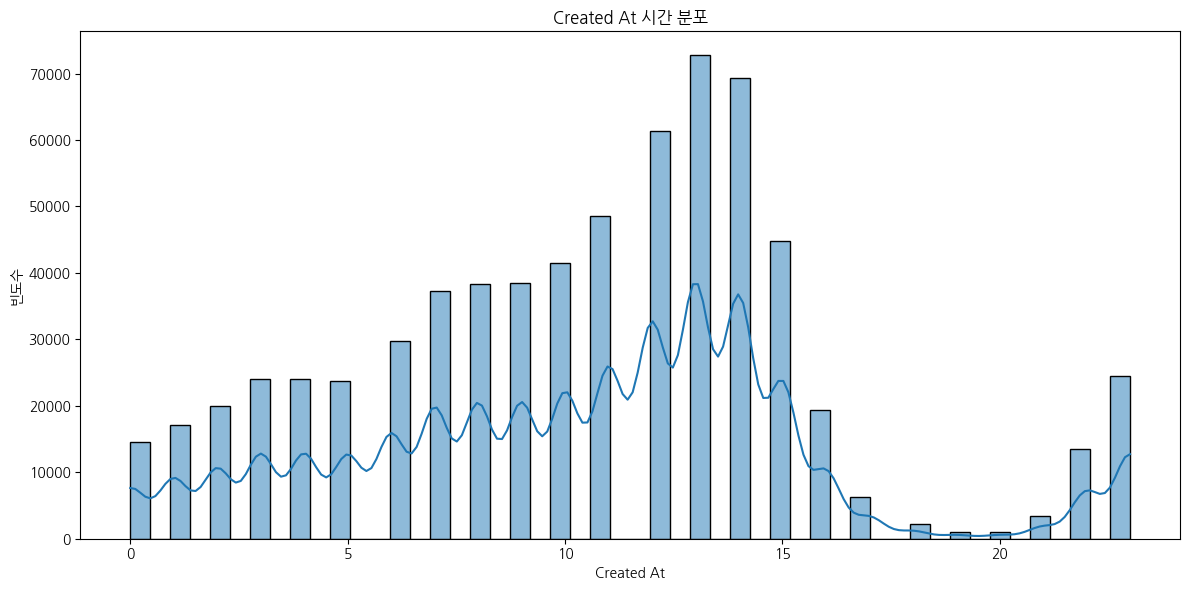

In [4]:
# 복사본 제작을 위해서
accounts_user = df_dict["accounts_user"].copy()
display(accounts_user.head())

# 우선 데이터 타입 확인
print("accounts_user 데이터 타입 확인")
print(accounts_user.dtypes)

# created_at 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(accounts_user['created_at'].dt.hour, bins=50, kde=True)
plt.title('Created At 시간 분포')
plt.xlabel('Created At')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

In [5]:
# 그렇다면 hackle 데이터에서 event_key가 "complete_signup"인 데이터 추출해서 시간대 분포 확인
# hackle 데이터 불러오기

## GCS에서 데이터 불러오기
final_hackle_df = pd.read_parquet(
    "gs://my-advanced_data-bucket/hackle_final/final.parquet",
    storage_options={"token": "/home/user/codeit_project/codeit-project-docker/config/key.json"}
)

display(final_hackle_df.head())

,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,NaN,NaN,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
1,00114c10-8321-4978-a73f-fd452162b9f2,2023-07-31 19:11:51,click_notice_detail,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
2,01f136ac-3257-4cf9-b0a9-c0c37fe7e572,2023-07-31 19:14:34,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
3,02cc364e-23ec-46cf-a02f-14cf60f97ec1,2023-07-31 19:13:18,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
4,05d05a79-cdb3-43fe-b931-5cb0992a36a1,2023-07-31 19:12:50,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0


In [6]:
# 데이터 타입 확인
print("final_hackle_df 데이터 타입 확인")
print(final_hackle_df.dtypes)

# 데이터 크기 확인
print("final_hackle_df 데이터 크기 확인")
print(final_hackle_df.shape)

# event_key가 "complete_signup"인 데이터 추출
complete_signup_df = final_hackle_df[final_hackle_df['event_key'] == 'complete_signup'].copy()

# 데이터 크기 확인
print("complete_signup_df 데이터 크기 확인")
print(complete_signup_df.shape)

final_hackle_df 데이터 타입 확인
event_id                  object
event_datetime    datetime64[ms]
event_key                 object
session_id                object
friend_count             float64
question_id              float64
heart_balance            float64
id                         int64
user_id                   object
device_id                 object
osname                    object
osversion                 object
dtype: object
final_hackle_df 데이터 크기 확인
(11406944, 12)
complete_signup_df 데이터 크기 확인
(974, 12)


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
13637,aef1aa85-4b53-4576-8a59-898c621bd8ea,2023-07-21 14:47:08,complete_signup,e118e264-5b37-4b29-9f65-737e614e6614,0.0,NaN,300.0,32,1579202,e118e264-5b37-4b29-9f65-737e614e6614,Android,13
31989,ddf14897-2a99-433d-bbe5-a5e32c83aefd,2023-07-18 11:26:59,complete_signup,83147b91-46d9-4060-b803-d0acfc8750b7,0.0,NaN,300.0,78,1578984,83147b91-46d9-4060-b803-d0acfc8750b7,Android,13
41705,9f57eccd-0be3-4256-bbd7-0aa5ea2f31cc,2023-07-18 15:54:53,complete_signup,CE0BB810-BE00-4C39-97AB-78F4E5D83285,0.0,NaN,300.0,103,1579005,CE0BB810-BE00-4C39-97AB-78F4E5D83285,iOS,16.5.1
48087,64452779-9565-4d14-b173-c6458227f22e,2023-08-07 19:58:55,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
48130,6a94e2be-7158-487f-b81f-cd04766a2a37,2023-07-19 01:06:22,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


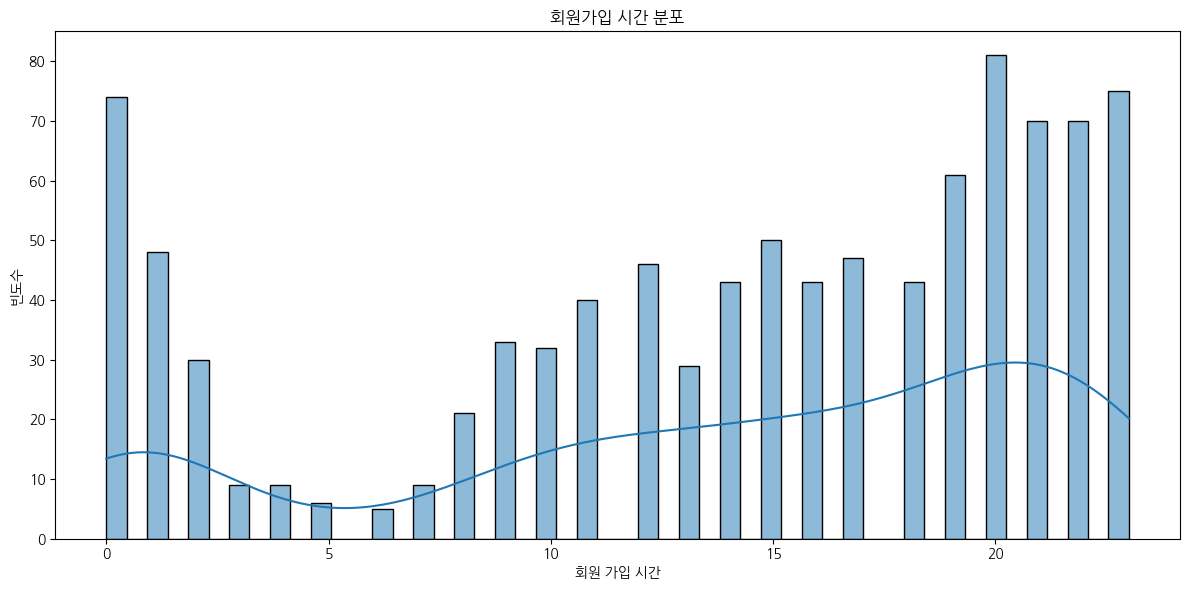

In [7]:
# 필터링한 데이터 확인
display(complete_signup_df.head())

# 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(complete_signup_df['event_datetime'].dt.hour, bins=50, kde=True)
plt.title('회원가입 시간 분포')
plt.xlabel('회원 가입 시간')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

- created_at에 9시간을 더해야한다는 이유
    - hackle 데이터와 accounts_user 데이터 살펴보면 9시간 차이가 남
    - 그리고 물론 점심 시간에 회원가입? 가능하다고 생각됨 하지만 새벽 시간대에 이용하는 유저가 지나치게 많아짐

In [8]:
# 만약 account_user 데이터에 created_at에 9시간을 더하게 되면? 시간대 분포는?
accounts_user["created_at_plus_9"] = accounts_user["created_at"] + pd.Timedelta(hours=9)

# 데이터 확인
display(accounts_user.head())

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,created_at_plus_9
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN,2023-03-29 12:44:14.047130
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0,2023-03-29 14:18:56.162368
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0,2023-03-29 21:56:34.989468
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0,2023-03-29 21:56:35.020790
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0,2023-03-29 21:56:35.049311


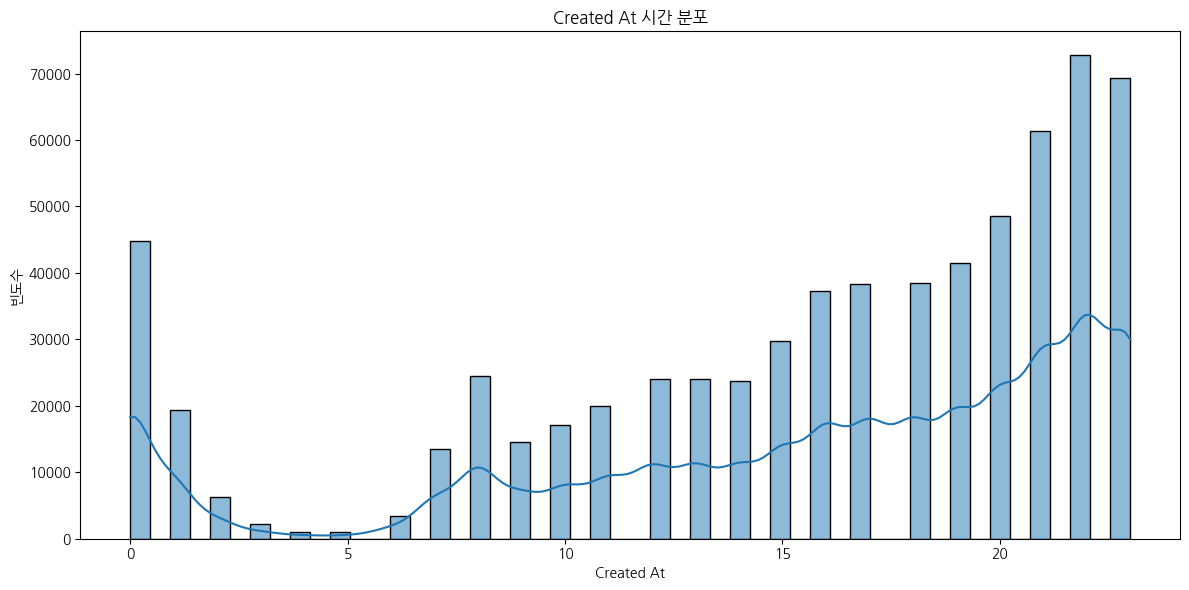

In [9]:
# 9시간을 더한 결과에 대해서 시각화 진행
# created_at 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(accounts_user['created_at_plus_9'].dt.hour, bins=50, kde=True)
plt.title('Created At 시간 분포')
plt.xlabel('Created At')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

- 위 내용을 통해서는 유저 획득이 오히려 밤에 이루어지는 경우가 존재함
- 저녁이나 밤에 활동이 많은 것은 확인함 그렇다면 점심이나 이른 시간대에는?
    - 방학이나 주말인 경우에 다를까?

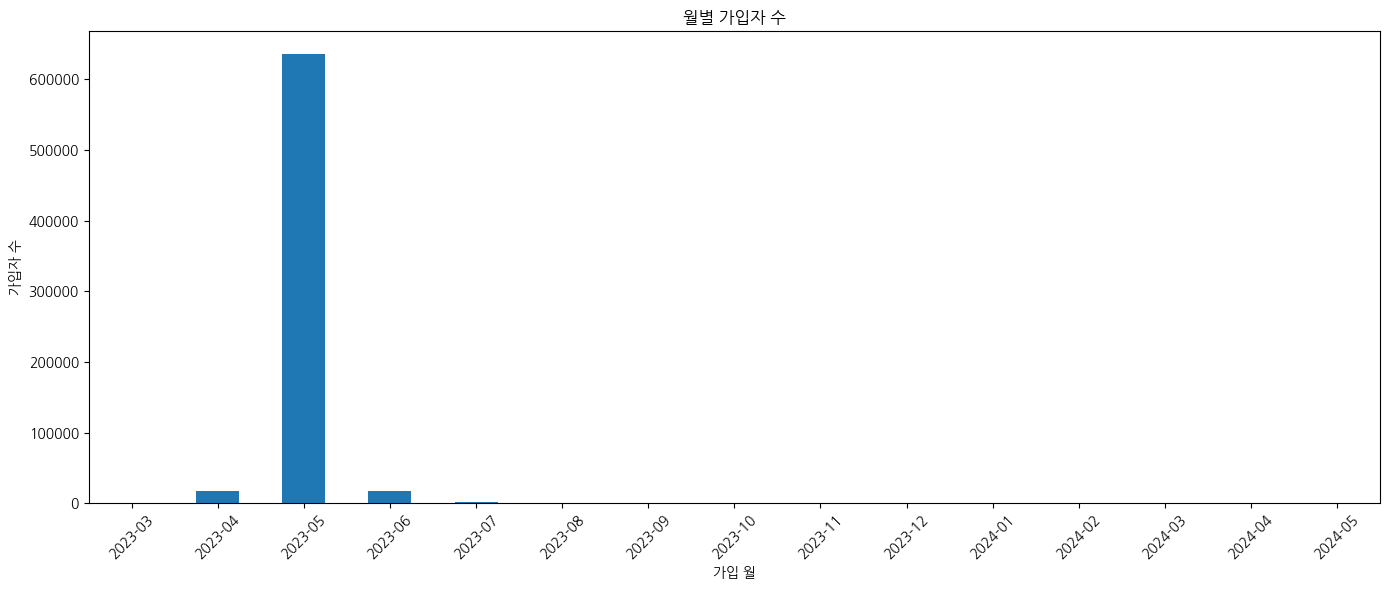

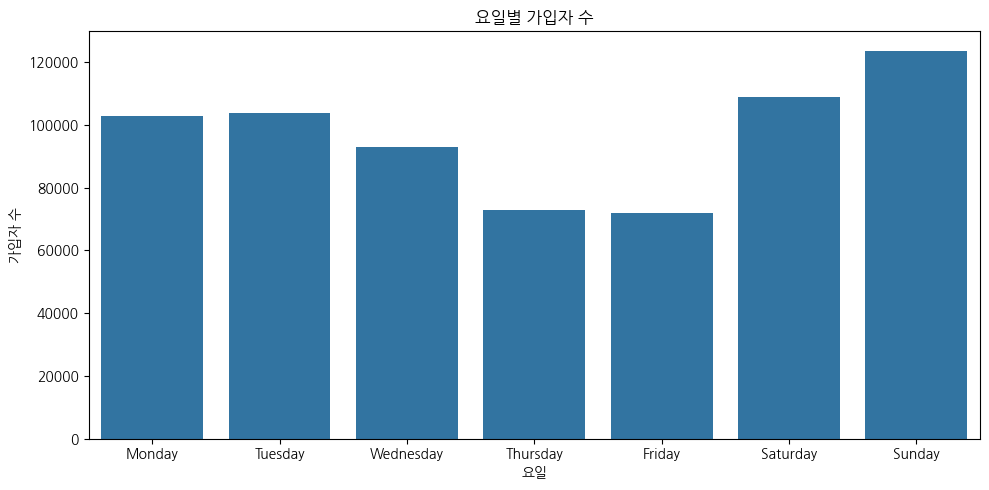

In [10]:
# 월별 가입자 수 집계 및 시각화
accounts_user['month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_counts = accounts_user.groupby('month').size()

plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='bar')
plt.title('월별 가입자 수')
plt.xlabel('가입 월')
plt.ylabel('가입자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 요일별 가입자 수 집계 및 시각화
accounts_user['weekday'] = accounts_user['created_at_plus_9'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = accounts_user['weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('요일별 가입자 수')
plt.xlabel('요일')
plt.ylabel('가입자 수')
plt.tight_layout()
plt.show()

- 주말에 좀 더 많은 회원가입이 있었음
- 평일 중 화요일~금요일까지는 감소하는 형태가 보임
    - 때문에 목요일, 금요일에 확실히 큰 감소가 보임
- 데이터가 6월에 초점이 되는 단기성 어플이기 때문에 계절에 따른 영향을 확인할 수 없음

추가로 볼 내용들

- 페이지 흐름 분석 (Signup Funnel)      
회원가입 전 어떤 페이지(또는 행동)들을 거치는가?        
목적 : 이탈률이 높은 지점은 어디인가?       

- 가입 소요 시간 분석       
방문해서 가입하기까지 걸린 시간 분포        
목적 : 바로 가입 vs 여러 번 방문 후 가입 구분       

- 신규 가입자의 초기 행동       
가입 직후 유저가 어떤 행동을 했는가?        
"활성화(Activation)"로 넘어가는 힌트를 여기서 얻음      

- 지역/시간대 기반 분석 (Geo-Temporal)      
지역별 가입자 수 (시/도, 나라, 도시 등)     
지역별 시간대 패턴 차이     



## 앱을 시작하고 회원가입 시작하는데 걸리는 시간 구하기
---
- complete_signup을 가진 session_id 탐색하여 그 session_id 중 launch_app을 가진 session_id가 존재하는지 확인
- complete_signup이 launch_app 보다 앞에 있는 경우가 존재하는지 확인
- 두 event 사이 시간 구하기

In [11]:
# 회원가입 전 event_key의 흐름을 파악하기 위해, 회원가입 완료 이벤트("complete_signup")가 발생한 session_id를 추출
signup_sessions = complete_signup_df['session_id'].unique()

# 해당 session_id에 속한 모든 이벤트를 추출
signup_sessions_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_sessions)].copy()

# 각 session별로 event_key의 순서를 확인
signup_sessions_events_sorted = signup_sessions_events.sort_values(['session_id', 'event_datetime'])

# 예시: 한 session의 event_key 시퀀스 확인
example_session_id = signup_sessions_events_sorted['session_id'].iloc[0]
example_session_events = signup_sessions_events_sorted[signup_sessions_events_sorted['session_id'] == example_session_id]['event_key'].tolist()
print(f"Example session ({example_session_id}) event sequence:")
print(example_session_events)

# 전체적으로 회원가입 전 event_key 시퀀스 집계 (상위 10개 패턴)

# session별 event_key 시퀀스 추출
session_event_sequences = (
    signup_sessions_events_sorted.groupby('session_id')['event_key']
    .apply(list)
    .reset_index(name='event_sequence')
)

# 시퀀스별로 count 집계
sequence_counts = session_event_sequences['event_sequence'].value_counts().head(10)
print("\nTop 10 signup funnel event sequences:")
for seq, count in sequence_counts.items():
    print(f"{seq} : {count}회")

Example session (00181B41-078B-4CA0-815F-72D24E5DDF9A) event sequence:
['launch_app', '$session_end', 'launch_app', '$session_start', '$session_end', 'launch_app', 'launch_app', '$session_start', '$session_start', 'launch_app', 'launch_app', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', '$session_end', 'view_signup', '$session_start', 'complete_signup', 'view_timeline_tap', 'click_bottom_navigation_timeline', 'click_bottom_navigation_questions', 'click_bottom_navigation_profile', 'view_lab_tap', 'view_timeline_tap', 'click_bottom_navigation_timeline', 'view_timeline_tap', 'view_timeline_tap', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_questions', 'click_bottom_navigation_questions', 'view_timeline_tap', 'click_question_start', 'view_lab_tap', 'view_timeline_tap', 'click_bottom_navigation_profile', 'view_timeline_tap', 'view_lab_tap', 'click_bottom_navigation_questions', 'view_timeline_tap', 'c

In [12]:
# event_key가 'complete_signup'인 데이터 중 user_id가 있는 경우와 없는 경우 수 파악
complete_signup_events = signup_sessions_events[signup_sessions_events['event_key'] == 'complete_signup']

user_id_exists = complete_signup_events['user_id'].notnull().sum()
user_id_missing = complete_signup_events['user_id'].isnull().sum()

print(f"user_id가 있는 경우: {user_id_exists}건")
print(f"user_id가 없는 경우: {user_id_missing}건")

user_id가 있는 경우: 974건
user_id가 없는 경우: 0건


In [13]:
from collections import Counter

# complete_signup 바로 직전 event_key를 찾기 위한 코드

# session_id와 event_datetime 기준으로 정렬된 데이터 사용
# 각 session별로 complete_signup 이벤트의 직전 event_key 추출

def get_prev_event_key(df):
    # df: 한 session의 이벤트 시퀀스 (이미 시간순 정렬됨)
    idx = df[df['event_key'] == 'complete_signup'].index
    prev_keys = []
    for i in idx:
        prev_idx = df.index.get_loc(i) - 1
        if prev_idx >= 0:
            prev_keys.append(df.iloc[prev_idx]['event_key'])
    return prev_keys

# session_id 기준으로 그룹화하여 직전 event_key 추출
prev_event_keys = signup_sessions_events_sorted.groupby('session_id').apply(get_prev_event_key)
# 리스트로 펼치기
prev_event_keys_flat = [item for sublist in prev_event_keys if sublist for item in sublist]

# 결과 집계
prev_event_key_counts = Counter(prev_event_keys_flat)

# 상위 10개 출력
print("complete_signup 바로 직전 event_key Top 10:")
for key, count in prev_event_key_counts.most_common(10):
    print(f"{key}: {count}회")

complete_signup 바로 직전 event_key Top 10:
$session_start: 534회
$session_end: 307회
view_signup: 133회


In [ ]:
# event_key가 complete_signup인 경우의 행이 얼마나 되는지
# 이거는 같은 session_id에 대해서 같은 complete_signup이 잇을 수 잇음음
print(f"이벤트 키가 complete_signup인 경우 : {final_hackle_df[final_hackle_df.event_key == "complete_signup"].shape[0]}")

(974, 12)

- event_key가 "session_start"와 "complete_signup" 의 차이를 구하기엔 위 내용처럼 complete_signup 바로 직전에 오는 경우가 존재하여 구하고자 하는 값이 제대로 구해지지 않을 것이기에 -> launch_app을 기준으로 하게 된다면?
- 그러기 위해서 우선 complete_signup을 가진 session_id에 모두 "complete_signup"이 존재하는지 확인
- 왜 session_id로 해야할까..? user_id로 하지 않는 이유는..?

In [27]:
# "complete_signup" 이벤트가 있는 session_id 추출
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'complete_signup', 'session_id'].unique()

# 해당 session_id의 모든 이벤트 추출
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# 각 session_id별로 "launch_app" 이벤트가 존재하는지 확인
has_launch_app = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "complete_signup"이 있는 session_id 중 "launch_app"이 없는 session_id 개수
num_sessions_without_launch_app = (~has_launch_app).sum()
print(f'"complete_signup" session 중 "launch_app"이 없는 session 수: {num_sessions_without_launch_app}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "launch_app"이 있었는지 확인
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 launch_app이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_sessions_all_events.groupby('session_id').apply(launch_app_before_signup)
num_sessions_without_launch_app_before = (~launch_app_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 없는 session 수: {num_sessions_without_launch_app_before}')
num_sessions_with_launch_app_before = (launch_app_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 있는 session 수: {num_sessions_with_launch_app_before}')

"complete_signup" session 중 "launch_app"이 없는 session 수: 0
"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 없는 session 수: 3
"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 있는 session 수: 970


In [22]:
# complete_signup 이전에 launch_app이 없는 session_id 추출
sessions_without_launch_app_before = launch_app_before[~launch_app_before].index.tolist()

print(f"complete_signup 이전에 launch_app이 없는 session_id 수: {len(sessions_without_launch_app_before)}")
print("예시 session_id 5개:", sessions_without_launch_app_before[:5])

# 해당 session의 이벤트 시퀀스 예시 출력
for session_id in sessions_without_launch_app_before[:3]:
    events = signup_sessions_all_events[signup_sessions_all_events['session_id'] == session_id].sort_values('event_datetime')
    print(f"\nSession ID: {session_id}")
    print(events[['event_datetime', 'event_key']])

complete_signup 이전에 launch_app이 없는 session_id 수: 3
예시 session_id 5개: ['96C2C47D-7BC2-4144-8AC6-1FADE599F10A', 'B941F9F9-CF53-4DAE-A204-75E666B5D277', 'FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72']

Session ID: 96C2C47D-7BC2-4144-8AC6-1FADE599F10A
             event_datetime                        event_key
4430933 2023-08-05 16:30:11                   $session_start
4430983 2023-08-05 16:30:47                      view_signup
4430978 2023-08-05 16:30:52                      view_signup
4430953 2023-08-05 16:31:11                      view_signup
4430959 2023-08-05 16:31:13                      view_signup
...                     ...                              ...
4430922 2023-08-08 12:28:30              click_question_open
4430945 2023-08-08 12:28:42  click_bottom_navigation_profile
4430941 2023-08-08 12:28:42                view_timeline_tap
4430961 2023-08-08 12:28:42                 view_profile_tap
4430918 2023-08-08 12:28:42                     view_lab_tap

[66 rows x 2 columns]

Sess

In [31]:
sessions_without_launch_app_before

['96C2C47D-7BC2-4144-8AC6-1FADE599F10A',
 'B941F9F9-CF53-4DAE-A204-75E666B5D277',
 'FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72']

In [55]:
# session_id 컬럼과 리스트 값 모두 str로 변환 및 strip 처리
final_hackle_df['session_id'] = final_hackle_df['session_id'].astype(str).str.strip()
sessions_without_launch_app_before = [str(s).strip() for s in sessions_without_launch_app_before]

for id in sessions_without_launch_app_before:
    print(f"session_id : {id}")
    display(final_hackle_df[(final_hackle_df['session_id'] == id) & 
                            (final_hackle_df['event_key'] == "launch_app")])
    display(final_hackle_df[(final_hackle_df['session_id'] == id) & 
                            (final_hackle_df['event_key'] == "complete_signup")])

session_id : 96C2C47D-7BC2-4144-8AC6-1FADE599F10A


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
4430957,8df748d5-4c63-40c1-8e24-32a8885d1e9d,2023-08-08 12:27:54,launch_app,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,51.0,NaN,1213.0,282944,1579742,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,iOS,16.6


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
4430971,d6ac0ed4-91b4-4c4c-8b58-b850934b30f0,2023-08-05 16:32:17,complete_signup,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,0.0,NaN,300.0,282944,1579742,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,iOS,16.6


session_id : B941F9F9-CF53-4DAE-A204-75E666B5D277


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
47355,06587f8b-d740-480d-94e4-3e299f6ee0fb,2023-08-07 12:00:41,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47357,069451e6-8fbf-4d61-ab7a-54b42641a551,2023-08-05 12:05:43,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47367,072a5918-b3a7-4d27-9793-a1f28bf844b6,2023-07-23 04:01:05,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,175.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47371,07aaa629-2aa1-4e93-97a6-68621630fff4,2023-08-07 19:50:34,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47373,07beb114-1f74-4f79-a01b-753323a651d2,2023-08-05 22:31:57,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
...,...,...,...,...,...,...,...,...,...,...,...,...
49215,f434ad7b-a668-4052-a472-f1080dcf70ac,2023-07-24 01:14:24,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,175.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
49240,f6df1394-8688-4ab3-bd41-b55bd1e35473,2023-07-24 03:23:16,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,175.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
49265,fa6d9115-593e-4147-a246-4fd8dd74f2e4,2023-08-02 14:06:16,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
49272,fb97b454-a4b4-46d0-846a-2d027379c08b,2023-07-25 11:32:29,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
48087,64452779-9565-4d14-b173-c6458227f22e,2023-08-07 19:58:55,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
48130,6a94e2be-7158-487f-b81f-cd04766a2a37,2023-07-19 01:06:22,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


session_id : FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
764183,04b3595a-24ce-4f45-8eaf-033ecaf94c92,2023-07-22 11:32:18,launch_app,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,0.0,NaN,597.0,239450,1579154,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,iOS,16.5.1
764235,9c3b0cbb-5e8a-4dd1-bc14-8d3723e6a9ef,2023-07-22 11:31:53,launch_app,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,0.0,NaN,300.0,239450,1579154,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,iOS,16.5.1


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
764220,6da2dcab-01d5-4fb5-b8f9-97c5fd43958e,2023-07-20 20:52:54,complete_signup,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,0.0,NaN,300.0,239450,1579154,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,iOS,16.5.1


launch_app이 complete_signup보다 늦은 경우들이 식별되었는데 그 중 한 session_id에 대해서는 complete_signup이 여러 값을 가짐     
- 이 친구들은 이상치로 판단 및 제거를 할지 고민

launch_app → complete_signup 평균 소요 시간: 664.93분
launch_app → complete_signup 중앙값 소요 시간: 2.02분


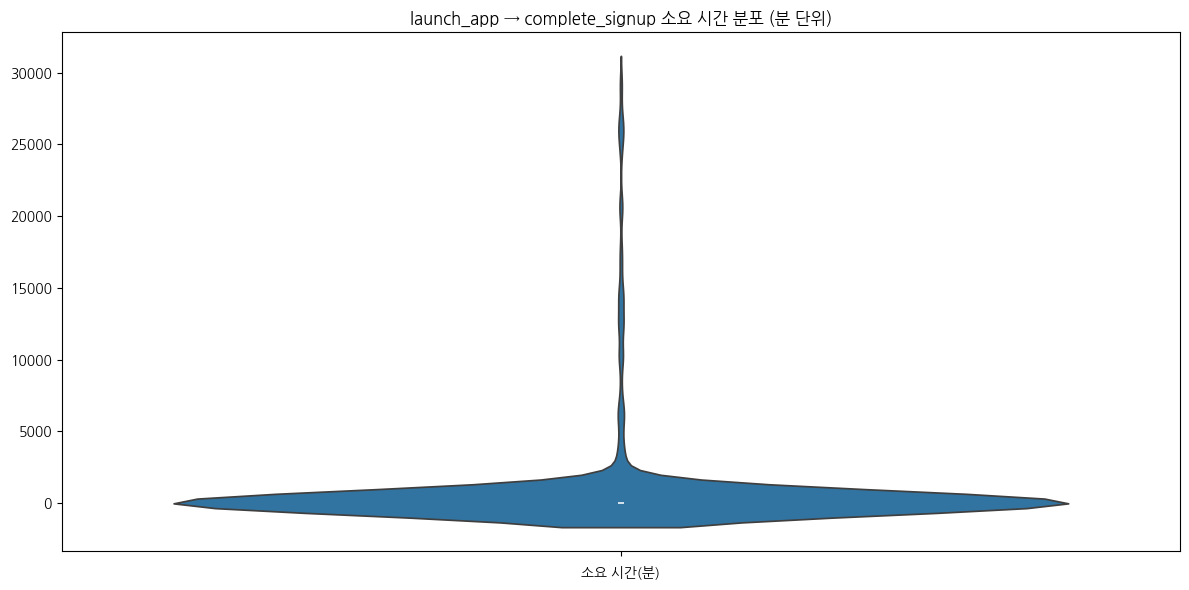

In [28]:
import numpy as np

# session_id별로 launch_app과 complete_signup의 시간 차이 구하기 (launch_app이 complete_signup보다 앞선 경우만)

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'launch_app', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # 가장 빠른 launch_app, 가장 빠른 complete_signup
    first_launch = launch_times.iloc[0]
    first_signup = signup_times.iloc[0]
    # launch_app이 complete_signup보다 앞선 경우만
    if first_launch < first_signup:
        return (first_signup - first_launch).total_seconds() / 60  # 분 단위
    else:
        return np.nan

# session_id별 시간 차이 계산
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# 평균, 중앙값
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"launch_app → complete_signup 평균 소요 시간: {mean_diff:.2f}분")
print(f"launch_app → complete_signup 중앙값 소요 시간: {median_diff:.2f}분")

# 바이올린 플롯 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('launch_app → complete_signup 소요 시간 분포 (분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

In [56]:
# 만약 view_signup을 기준으로 하게 된다면?
# 일단 complete_signup 을 가진 session_id들 중 view_signup 가지지 않은 session_id 잇는지 확인

# "complete_signup" 이벤트가 있는 session_id 추출
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'complete_signup', 'session_id'].unique()

# 해당 session_id의 모든 이벤트 추출
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# 각 session_id별로 "view_signup" 이벤트가 존재하는지 확인
has_view_signup = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'view_signup' in x.values)

# "complete_signup"이 있는 session_id 중 "view_signup"이 없는 session_id 개수
num_sessions_without_view_signup = (~has_view_signup).sum()
print(f'"complete_signup" session 중 "view_signup"이 없는 session 수: {num_sessions_without_view_signup}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "view_signup"이 있었는지 확인
def view_signup_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 view_signup이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'view_signup').any()

view_signup_before = signup_sessions_all_events.groupby('session_id').apply(view_signup_before_signup)
num_sessions_without_view_signup_before = (~view_signup_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 없는 session 수: {num_sessions_without_view_signup_before}')
num_sessions_with_view_signup_before = (view_signup_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 있는 session 수: {num_sessions_with_view_signup_before}')

"complete_signup" session 중 "view_signup"이 없는 session 수: 0
"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 없는 session 수: 0
"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 있는 session 수: 973


view_signup → complete_signup 평균 소요 시간: 167.11분
view_signup → complete_signup 중앙값 소요 시간: 1.52분


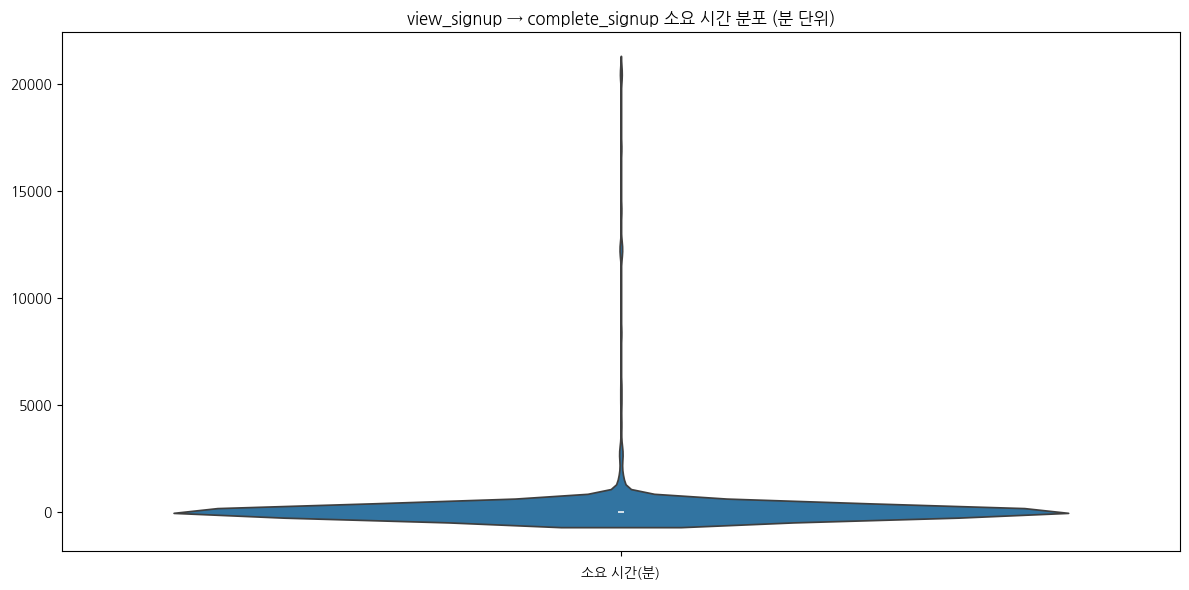

In [57]:
# 해당 결과로는 view_signup이 모두 complete_signup 이전에 있기 때문에 이상이 없음
# session_id 별로 view_signup과 complete_signup 시간 차이 구하기

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'view_signup', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # 가장 빠른 view_signup, 가장 빠른 complete_signup
    first_launch = launch_times.iloc[0]
    first_signup = signup_times.iloc[0]
    # view_signup이 complete_signup보다 앞선 경우만
    if first_launch < first_signup:
        return (first_signup - first_launch).total_seconds() / 60  # 분 단위
    else:
        return np.nan

# session_id별 시간 차이 계산
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# 평균, 중앙값
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"view_signup → complete_signup 평균 소요 시간: {mean_diff:.2f}분")
print(f"view_signup → complete_signup 중앙값 소요 시간: {median_diff:.2f}분")

# 바이올린 플롯 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('view_signup → complete_signup 소요 시간 분포 (분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

#### view_signup 에서 가장 작은 값 -> complete_signup 에서 가장 큰 값
---
- view_signup 에서 첫번재 값은 회원가입을 시도한 것으로 확인 가능
- complete_signup 마지막 값은 회원가입이 최종적으로 완료되었다고 판단 가능

view_signup → complete_signup 평균 소요 시간: 196.39분
view_signup → complete_signup 중앙값 소요 시간: 1.52분


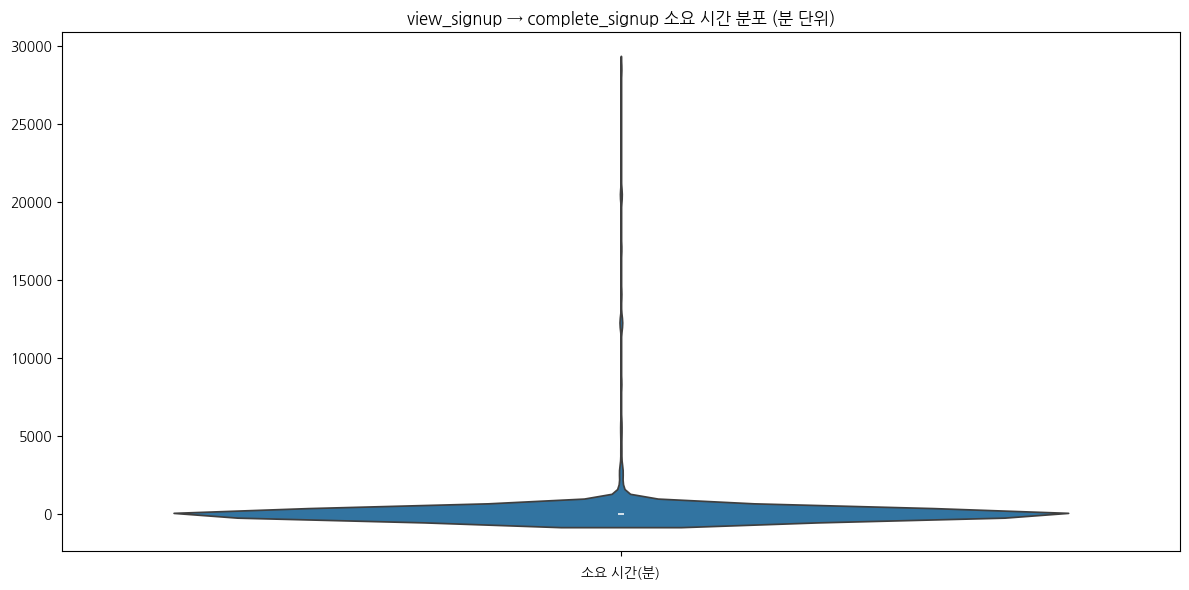

In [58]:
# 해당 결과로는 view_signup이 모두 complete_signup 이전에 있기 때문에 이상이 없음
# session_id 별로 view_signup과 complete_signup 시간 차이 구하기
# view_signup에서는 가장 첫번째 값으로 하고 complete_signup는 가장 마지막 값으로 하여 차이 확인인

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'view_signup', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # 가장 빠른 view_signup, 가장 빠른 complete_signup
    first_launch = launch_times.iloc[0]
    last_signup = signup_times.iloc[-1]
    # view_signup이 complete_signup보다 앞선 경우만
    if first_launch < last_signup:
        return (last_signup - first_launch).total_seconds() / 60  # 분 단위
    else:
        return np.nan

# session_id별 시간 차이 계산
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# 평균, 중앙값
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"view_signup → complete_signup 평균 소요 시간: {mean_diff:.2f}분")
print(f"view_signup → complete_signup 중앙값 소요 시간: {median_diff:.2f}분")

# 바이올린 플롯 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('view_signup → complete_signup 소요 시간 분포 (분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

- 위 결과를 보면 view_signup -> complete_signup 까지 걸리는 시간의 중앙값은 1.52분으로 대략 2분 경과하는 것으로 보임
- launch_app -> complete_signup 을 통해서 앱을 실행하고 회원가입까지 하는데 걸리는 시간은 중앙값은 2.02분으로 대략 2분 경과
-> 이를 통해서 앱을 실행하고 얼마 되지 않아 바로 회원가입하는 유저들이 많을 것으로 유추 가능
- 그렇다면 launch_app -> view_signup까지는 주로 경로는 어떻게 되는걸까?
    - 회원가입하기 전에 뭔가 더 둘러보는 유저는 없는걸까?

+ 추가로 user_id로 살펴볼 필요가 있겠다 지금까지 session_id로 봤는데 user_id로 보면 달라질까?       
- user가 두 번 회원가입하는 경우가 존재하는가?
- session_id로 봤을때랑은 달라지는가?


## user_id로 변경하였을 때 결과가 달라지는가에 대한 탐색
---

In [61]:
# 동일한 user_id에 대해 complete_signup 이벤트가 2번 이상 발생한 경우 확인
user_signup_counts = final_hackle_df[final_hackle_df['event_key'] == 'complete_signup'].groupby('user_id').size()
multiple_signup_users = user_signup_counts[user_signup_counts > 1]

print(f"complete_signup 이벤트가 2번 이상 발생한 user_id 수: {len(multiple_signup_users)}")
print("예시 user_id 및 발생 횟수:")
print(multiple_signup_users.head())

complete_signup 이벤트가 2번 이상 발생한 user_id 수: 2
예시 user_id 및 발생 횟수:
user_id
1579289    2
1579831    2
dtype: int64


In [65]:
# 해당 유저들 확인

display(final_hackle_df[(final_hackle_df.user_id == '1579289') & (final_hackle_df.event_key == "complete_signup")])
display(final_hackle_df[(final_hackle_df.user_id == '1579831') & (final_hackle_df.event_key == "complete_signup")])

,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
1131382,774bede5-4c42-44f7-b0a2-0ee47ffe298b,2023-07-22 21:18:13,complete_signup,aca1b21d-cfe2-4089-9379-0faf9ab6107f,0.0,NaN,300.0,87102,1579289,aca1b21d-cfe2-4089-9379-0faf9ab6107f,Android,10
1734311,636e920e-8772-42fc-84e8-e338667cf9d6,2023-07-22 21:11:16,complete_signup,a10275ea-e0f6-4bbc-b3a9-ddebfd412bc8,0.0,NaN,300.0,225751,1579289,a10275ea-e0f6-4bbc-b3a9-ddebfd412bc8,Android,10


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
48087,64452779-9565-4d14-b173-c6458227f22e,2023-08-07 19:58:55,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
48130,6a94e2be-7158-487f-b81f-cd04766a2a37,2023-07-19 01:06:22,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


In [68]:
ex = final_hackle_df[final_hackle_df["user_id"] == "1579831"].sort_values(by="event_datetime")

# 'ex'의 event_datetime 컬럼에서 날짜별(event_date) 이벤트 수 집계
ex['event_date'] = ex['event_datetime'].dt.date
date_event_counts = ex.groupby('event_date').size()

print(date_event_counts)

event_date
2023-07-19    188
2023-07-23    198
2023-07-24    180
2023-07-25    175
2023-07-26     98
2023-07-27     79
2023-07-29     57
2023-07-30     44
2023-07-31     15
2023-08-01     40
2023-08-02     79
2023-08-04    141
2023-08-05    256
2023-08-06     92
2023-08-07    222
2023-08-08     90
2023-08-09     43
dtype: int64


In [69]:
# 제외할 user_id 리스트 (예: 두 번 회원가입한 유저)
exclude_user_ids = ['1579289', '1579831']

# complete_signup_df에서 제외할 user_id를 제외
filtered_signup_df = complete_signup_df[~complete_signup_df['user_id'].isin(exclude_user_ids)]

# 회원가입 완료 이벤트("complete_signup")가 발생한 user_id 추출
signup_users = filtered_signup_df['user_id'].unique()

# 해당 user_id에 속한 모든 이벤트를 추출
signup_users_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_users)].copy()

# 각 user별로 event_key의 순서를 확인
signup_users_events_sorted = signup_users_events.sort_values(['user_id', 'event_datetime'])

# 예시: 한 user의 event_key 시퀀스 확인
example_user_id = signup_users_events_sorted['user_id'].iloc[0]
example_user_events = signup_users_events_sorted[signup_users_events_sorted['user_id'] == example_user_id]['event_key'].tolist()
print(f"Example user ({example_user_id}) event sequence:")
print(example_user_events)

# 전체적으로 회원가입 전 event_key 시퀀스 집계 (상위 10개 패턴)
# user별 event_key 시퀀스 추출
user_event_sequences = (
    signup_users_events_sorted.groupby('user_id')['event_key']
    .apply(list)
    .reset_index(name='event_sequence')
)

# 시퀀스별로 count 집계
sequence_counts = user_event_sequences['event_sequence'].value_counts().head(10)
print("\nTop 10 signup funnel event sequences (by user):")
for seq, count in sequence_counts.items():
    print(f"{seq} : {count}회")

Example user (1006061) event sequence:
['launch_app', '$session_start', 'launch_app', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click_bottom_navigation_questions', 'click_attendance', 'launch_app', 'click_question_ask', 'click_bottom_navigation_timeline', 'click_bottom_navigation_lab', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'click_bottom_navigation_profile', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', '$session_end', 'launch_app', '$session_start', 'click_appbar_alarm_center', '$session_end', 'launch_app', '$session_start', 'click_question_share', 'click_question_open', 'click_question_share', 'click_attendance', 'click_question_start', 'skip_question', 'skip_question', 'skip_question', 'complete_question', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click

In [70]:
from collections import Counter

# complete_signup 바로 직전 event_key를 찾기 위한 코드

# user_id와 event_datetime 기준으로 정렬된 데이터 사용
# 각 session별로 complete_signup 이벤트의 직전 event_key 추출

def get_prev_event_key(df):
    # df: 한 session의 이벤트 시퀀스 (이미 시간순 정렬됨)
    idx = df[df['event_key'] == 'complete_signup'].index
    prev_keys = []
    for i in idx:
        prev_idx = df.index.get_loc(i) - 1
        if prev_idx >= 0:
            prev_keys.append(df.iloc[prev_idx]['event_key'])
    return prev_keys

# user_id 기준으로 그룹화하여 직전 event_key 추출
prev_event_keys = signup_users_events_sorted.groupby('user_id').apply(get_prev_event_key)
# 리스트로 펼치기
prev_event_keys_flat = [item for sublist in prev_event_keys if sublist for item in sublist]

# 결과 집계
prev_event_key_counts = Counter(prev_event_keys_flat)

# 상위 10개 출력
print("complete_signup 바로 직전 event_key Top 10:")
for key, count in prev_event_key_counts.most_common(10):
    print(f"{key}: {count}회")

complete_signup 바로 직전 event_key Top 10:
$session_start: 531회
$session_end: 307회
view_signup: 132회


## launch_app -> view_signup 사이 발생하는 일들에 대해서
---

In [59]:
# 우선 회원가입에 무관하게(회원가입을 완료하였는가에 대해서 무관하게)
# "view_signup" 이벤트가 있는 session_id 추출
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'session_id'].unique()

# 해당 session_id의 모든 이벤트 추출
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# 각 session_id별로 "launch_app" 이벤트가 존재하는지 확인
has_launch_app = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "view_signup"이 있는 session_id 중 "launch_app"이 없는 session_id 개수
num_sessions_without_launch_app = (~has_launch_app).sum()
print(f'"view_signup" session 중 "launch_app"이 없는 session 수: {num_sessions_without_launch_app}')

# "view_signup" 이벤트가 발생한 시점 이전에 "launch_app"이 있었는지 확인
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'view_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 launch_app이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_sessions_all_events.groupby('session_id').apply(launch_app_before_signup)
num_sessions_without_launch_app_before = (~launch_app_before).sum()
print(f'"view_signup" session 중 "view_signup" 이전에 "launch_app"이 없는 session 수: {num_sessions_without_launch_app_before}')
num_sessions_with_launch_app_before = (launch_app_before).sum()
print(f'"view_signup" session 중 "view_signup" 이전에 "launch_app"이 있는 session 수: {num_sessions_with_launch_app_before}')

"view_signup" session 중 "launch_app"이 없는 session 수: 11
"view_signup" session 중 "view_signup" 이전에 "launch_app"이 없는 session 수: 37
"view_signup" session 중 "view_signup" 이전에 "launch_app"이 있는 session 수: 6649


In [60]:
# launch_app 을 가진 session 아이디와 user_id 유니크 값

print(f"launch_app 이벤트를 가진 유니크한 session_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'launch_app', 'session_id'].nunique()}")
print(f"launch_app 이벤트를 가진 유니크한 user_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'launch_app', 'user_id'].nunique()}")
print()
print(f"view_signup 이벤트를 가진 유니크한 session_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'session_id'].nunique()}")
print(f"view_signup 이벤트를 가진 유니크한 user_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'user_id'].nunique()}")

launch_app 이벤트를 가진 유니크한 session_id : 242211
launch_app 이벤트를 가진 유니크한 user_id : 239538

view_signup 이벤트를 가진 유니크한 session_id : 6686
view_signup 이벤트를 가진 유니크한 user_id : 6664
